<a href="https://colab.research.google.com/github/mlaguna10/MLT_solutions/blob/master/Laboratorio_2_MLT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


<img src="https://cursos.virtual.uniandes.edu.co/isis4219/wp-content/uploads/sites/162/2014/11/cropped-misisheader.png" ><br>
# Machine Learning Techniques - ISIS4219

Intersemestral 2020




## Estudiantes

1. Ramiro Vargas Salas.
2. Mateo Laguna Guantiva.

## Objetivos

*   Aprender los diferentes tipos de regularizadores dentro de una Regresión.
*   Aprender a entonar los hiperparámetros de un modelo.
*   Resolver un problema real de probabilidad según unas variables establecidas.



## Primer Problema
<p style="text-align: justify;"> En el mercado inmobiliario, un aspecto que resulta de gran interés es cómo identificar rápidamente las oportunidades de inversión. Los precios de las viviendas pueden aumentar o caer rápidamente, pero los sitios online disponibles, que ofrecen casas en venta o alquiler, no se actualizan con la misma celeridad. Por otra parte, las personas que utilizan estas facilidades en línea lo hacen con el objetivo de obtener una buena recomendación sobre el monto para la transacción, pero estos sitios, al no tener un mecanismo de actualización de precios, no pueden suministrar apoyo en tiempo real para satisfacer tales requerimientos. Una de estas empresas desea desarrollar una aplicación que permita estimar el precio de mercado de casas de manera automática en función de la realidad del mercado. Un aspecto importante para ellos es poder identificar las características más relevantes que permitan alcanzar un alto rendimiento predictivo.</p>

### 1. Importando las librerias requeridas para el desarrollo del laboratorio

Para el manejo de los datos se van a utilizar las librerías de `Pandas` y para la visualización y perfilamiento se utilizará la librería `pandas-profiling`. En caso de no tener la librería en el ambiente de desarrollo, puede utilizar el siguiente comando.
```python
!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip
````

Además, para la preparación de los datos, entrenamiento del modelo y evaluación se utilizará la librería `scikit-learn`. <br>
Por último, para visualización de los datos se utiliza la librería `matplotlib`.

In [ ]:
import pandas as pd
from pandas_profiling import ProfileReport

from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures 
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler

import matplotlib.pyplot as plt

import numpy as np


### 2. Perfilamiento y entendimiento de los datos



#### Lectura de los datos
Primero, se leen los datos y se visualizan que se hayan leido correctamente.

In [ ]:
url = 'https://raw.githubusercontent.com/jcestevezc/Machine-Learning-Techniques/master/Laboratorio%202/Problema%201/kc_house_data.csv'
data = pd.read_csv(url)
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


#### Entendimiento de los Datos

A continuación se describe el diccionario de datos del dataset.

| Nombre | Descripción |
| --- | --- |
|id:| a notation for a house.|
|date:| Date house was sold.|
|price:| Price is prediction target.|
|bedrooms:| Number of Bedrooms/House.|
|bathrooms:| Number of bathrooms/House.|
|sqft_living:| square footage of the home.|
|sqft_lotsquare:| footage of the lot.|
|floors:| Total floors (levels) in house.|
|waterfront:| House which has a view to a waterfront.|
|view:| Has been viewed.|
|condition:| How good the condition is ( Overall ).|
|gradeoverall:| grade given to the housing unit, based on King County grading system.|
|sqft_above:| square footage of house apart from basement.|
|sqft_basement:| square footage of the basement.|
|yr_built:| Built Year.|
|yr_renovated:| Year when house was renovated.|
|zipcode:| zip.|
|lat:| Latitude coordinate.|
|long:| Longitude coordinate.|
|sqft_living15:| Living room area in 2015(implies-- some renovations) This might or might not have affected the lotsize area.|
|sqft_lot15:| lotSize area in 2015(implies-- some renovations).|


Para visualizar la distribución, los valores que toman los datos, la cantidad de ceros o nulos, el tipo de dato y la correlación entre ellos, se utiliza `pandas-profiling`.

In [ ]:
#si se muestra el report, el notebook se detiene en mi PC :(, pero sí lo analizamos)
profile = ProfileReport(data)

### 3. Limpieza y preparación de datos

#### 3.1 Tratamiento de datos atípicos

Se identifica en el perfilamiento que los siguientes campos posiblemente tienen datos atípicos:
* Price
* Bedrooms
* Sqft_living

In [ ]:
def outlier_cleaning(data):
  # Cleaning price
  data = data[np.abs(data.price - data.price.mean()) <= ( 3 * data.price.std())]
  data = data[~(np.abs(data.price - data.price.mean()) > (3 * data.price.std()))]

  # Cleaning  bedrooms
  data = data[np.abs(data.bedrooms - data.bedrooms.mean()) <= ( 3 * data.bedrooms.std())]
  data = data[~(np.abs(data.bedrooms - data.bedrooms.mean()) > (3 * data.bedrooms.std()))]

  # Cleaning sqft_living
  data = data[np.abs(data.sqft_living - data.sqft_living.mean()) <= ( 3 * data.sqft_living.std())]
  data = data[~(np.abs(data.sqft_living - data.sqft_living.mean()) > (3 * data.sqft_living.std()))]

  return data

#### 3.2 Selección de campos

Primero, se construyen los conjuntos X y Y que van a ser utilizados en el modelo. Dado que queremos predecir el precio, la variable predictora (Y) tendrá el precio de los inmuebles. Y se utilizarán como variables descriptoras (X) las proporcionadas por el conjunto de dats excepto `id`, `date` y `zipcode` debido a que no son realmente descriptoras del problema, Además, como se muestra en la tabla de correlación, se establece un umbral de $0.8$ para establecer autocorrelación. Por ello, se decide eliminar la variable `sqft_above`.

In [ ]:
columns = ['id','date','zipcode','sqft_above']

In [ ]:
def data_selection(data, columns):
  data = data.drop(columns,axis=1)
  return data

In [ ]:
data = data.pipe(outlier_cleaning).pipe(data_selection,columns)

In [ ]:
X = data.drop(['price'],axis=1)
y = data['price']

#### 3.3 Estandarización de campos

Debido a que los algoritmos de regresión se ven afectados por la escala en la que se encuentra cada uno de los atributos, es necesario aplicar una transformación para que todos queden en la misma escala.

In [ ]:
columns = X.columns

In [ ]:
from sklearn.pipeline import Pipeline

pipeline_cleaning = Pipeline([
 ('normalization', MinMaxScaler(feature_range=(0, 1))),
 ])

In [ ]:
X = pipeline_cleaning.fit_transform(X)

In [ ]:
X = pd.DataFrame(X,columns=columns)

Con las variables definidas, se procede a construir los conjuntos de entrenamiento y test.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=33)

### 4. Modelamiento

#### **Regresión Linear Regularizada**

La regularización ayuda a resolver el problema de sobreajuste, lo que implica que el modelo funciona bien en los datos de entrenamiento pero tiene un mal desempeño en los datos de validación (prueba). 

La regularización resuelve este problema al agregar un término de penalización a la función objetivo y controlar la complejidad del modelo utilizando ese término de penalización.

La regularización es generalmente útil en las siguientes situaciones:

*   Gran cantidad de variables
*   Baja relación de observaciones numéricas a número de variables
*   Alta multicolinealidad


#### **Regresión Ridge**

* La regresión Ridge (cresta) o la *regresión por contracción* hace uso de la regularización de L2. 

* En la regularización de L2 intentamos minimizar la función objetivo agregando un término de penalización(alpha) a la suma de los cuadrados de los coeficientes. 

* Generalmente, a mayor valor de alpha más regularización por lo tanto el modelo se simplifica más.

In [ ]:
from sklearn.linear_model import Ridge

RidgeModel = Ridge(alpha = 0.5).fit(X_train, y_train)

In [ ]:
list(zip(X_train, RidgeModel.coef_))

[('bedrooms', -57259.33219768354),
 ('bathrooms', 134123.83945327793),
 ('sqft_living', 320554.2725793818),
 ('sqft_lot', 321114.8959695463),
 ('floors', 79515.02666845491),
 ('waterfront', 127282.13187094506),
 ('view', 138984.32418364912),
 ('condition', 117858.5785804166),
 ('grade', 682482.5723889205),
 ('sqft_basement', 4161.982782422227),
 ('yr_built', -207423.12968102717),
 ('yr_renovated', 36340.789274494615),
 ('lat', 331258.0472429201),
 ('long', -34855.05293488462),
 ('sqft_living15', 272960.9311826589),
 ('sqft_lot15', -79216.47906834104)]

##### **Predicción**

In [ ]:
RidgePredictions = RidgeModel.predict(X_test)

##### **Validación**

In [ ]:
r2_score(y_test, RidgePredictions)

0.684133422114447

#### **Regresión Lasso** (Least Absolute Shrinkage and Selection Operator)

In [ ]:
from sklearn.linear_model import Lasso

LassoModel = Lasso().fit(X_train, y_train)

##### **Regularización L1**

La regresión de lazo hace uso de la regularización L1. 

En la regularización L1 intentamos minimizar la función objetivo agregando un término de penalización a la suma de los valores absolutos de los coeficientes. Esto también se conoce como método de desviaciones menos absolutas.

##### **Predicción**

In [ ]:
LassoPredictions = LassoModel.predict(X_test)

##### **Validación**

In [ ]:
r2_score(y_test, LassoPredictions)

0.6841732255224815

##### **Optimización de hiperparametros**

A continuación se establece la grilla de parametros a optimizar:

In [ ]:
from sklearn.model_selection import GridSearchCV

lasso_params = {'alpha':[0.02, 0.024, 0.025, 0.026, 0.03]}

Si elegimos alpha = 0, volvemos a las estimaciones de mínimos cuadrados habituales. Si se elige lambda para que sea muy grande, dará lugar a un ajuste insuficiente. Por lo tanto, es muy importante determinar un valor deseable de lambda.

In [ ]:
GridSearchCV(Lasso(), param_grid=lasso_params).fit(X_train, y_train).best_estimator_

Lasso(alpha=0.03)

Como se observa en la línea anterior un alpha de 0.03 genera una mejor capacidad de predicción. Por lo tanto el mejor modelo viene dado por:

In [ ]:
LassoModel = Lasso(alpha=0.03).fit(X_train, y_train)

In [ ]:
list(zip(X_train, LassoModel.coef_))

[('bedrooms', -57240.49423988212),
 ('bathrooms', 134129.08514230515),
 ('sqft_living', 319403.23540916486),
 ('sqft_lot', 362445.2706949329),
 ('floors', 79443.6105699448),
 ('waterfront', 128474.95594817043),
 ('view', 138666.15025583073),
 ('condition', 118052.87527554375),
 ('grade', 685708.618890184),
 ('sqft_basement', 4307.990251675785),
 ('yr_built', -207849.92807452372),
 ('yr_renovated', 36276.578983829284),
 ('lat', 331311.9988600889),
 ('long', -35099.48273798961),
 ('sqft_living15', 273339.2387113439),
 ('sqft_lot15', -94640.61029983085)]

#### **Lasso o Ridge?**

* En general, L2 funciona mejor que la 
regularización L1. L2 es eficiente en términos de cálculo. 

* Hay un área donde L1 se considera como una opción preferida sobre L2. L1 tiene una selección de características incorporada para espacios de características dispersos. Por ejemplo, está prediciendo si una persona tiene un tumor cerebral usando más de 20,000 marcadores genéticos (características). Se sabe que la gran mayoría de los genes tienen poco o ningún efecto sobre la presencia o gravedad de la mayoría de las enfermedades.
* La regresión de lazo puede realizar una selección de variables incorporada, así como la contracción de parámetros. Al usar la regresión de Ridge, uno puede terminar obteniendo todas las variables pero con Parámetros Reducidos.

## Segundo Problema


Uno de los grandes problemas de las redes sociales es la creación de perfiles falsos debido a que implica desde creaciones superficiales de seguidores hasta tráfico de influencias y suplantación de identidad, una de las redes sociales que cuenta con más cuentas falsas es Instagram. Para eso, se quiere identificar las características y la probabilidad de un usuario de Instagram sea clasificado como una cuenta 'real' o una cuenta 'spammer'.<br><br>
Para más información de los datos se encuentran en: https://www.kaggle.com/free4ever1/instagram-fake-spammer-genuine-accounts

### 1. Importando las librerias requeridas para el desarrollo del laboratorio

Adicionalmente a las librerías importadas anteriormente, se importa el método de `LogisticRegression` y `classification_report` de la librería `scklearn`.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

### 2. Perfilamiento y entendimiento de los datos



#### Lectura de los datos
Primero, se leen los datos y se visualizan que se hayan leido correctamente.

In [ ]:
train = pd.read_csv("https://raw.githubusercontent.com/jcestevezc/Machine-Learning-Techniques/master/Laboratorio%202/Problema%202/train.csv")
test = pd.read_csv("https://raw.githubusercontent.com/jcestevezc/Machine-Learning-Techniques/master/Laboratorio%202/Problema%202/test.csv")

#si se muestra el report, el notebook se detiene en mi PC :(, pero sí lo analizamos)
profile2 = ProfileReport(train)

### 3. Preparación de los datos

Dado que ya se provee un conjunto de entrenamiento y un conjunto de test, se procede a separar las variables descriptoras y la variable a predecir.

In [ ]:
X_train, Y_train = train.drop(['fake'],axis=1), train['fake']
X_test, Y_test = test.drop(['fake'],axis=1), test['fake']
display(X_train.head())

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows
0,1,0.27,0,0.0,0,53,0,0,32,1000,955
1,1,0.00,2,0.0,0,44,0,0,286,2740,533
2,1,0.10,2,0.0,0,0,0,1,13,159,98
3,1,0.00,1,0.0,0,82,0,0,679,414,651
4,1,0.00,2,0.0,0,0,0,1,6,151,126


#### 4. Modelamiento

In [ ]:
regression = LogisticRegression()
regression.fit(X_train,Y_train)


LogisticRegression()

#### 5. Predicción

In [ ]:
proba = regression.predict_proba(X_test)
pred = regression.predict(X_test)
['Prediccion: {0} -- Probabilidad 0: {1:.2f} / Probabilidad 1:  {2:.2f}'.format(pred[i],p[0],p[1]) for i,p in enumerate(proba)]

['Prediccion: 1 -- Probabilidad 0: 0.41 / Probabilidad 1:  0.59',
 'Prediccion: 0 -- Probabilidad 0: 0.95 / Probabilidad 1:  0.05',
 'Prediccion: 0 -- Probabilidad 0: 1.00 / Probabilidad 1:  0.00',
 'Prediccion: 0 -- Probabilidad 0: 1.00 / Probabilidad 1:  0.00',
 'Prediccion: 1 -- Probabilidad 0: 0.42 / Probabilidad 1:  0.58',
 'Prediccion: 0 -- Probabilidad 0: 0.68 / Probabilidad 1:  0.32',
 'Prediccion: 0 -- Probabilidad 0: 0.89 / Probabilidad 1:  0.11',
 'Prediccion: 0 -- Probabilidad 0: 0.87 / Probabilidad 1:  0.13',
 'Prediccion: 0 -- Probabilidad 0: 0.89 / Probabilidad 1:  0.11',
 'Prediccion: 0 -- Probabilidad 0: 0.96 / Probabilidad 1:  0.04',
 'Prediccion: 0 -- Probabilidad 0: 0.74 / Probabilidad 1:  0.26',
 'Prediccion: 0 -- Probabilidad 0: 1.00 / Probabilidad 1:  0.00',
 'Prediccion: 0 -- Probabilidad 0: 0.77 / Probabilidad 1:  0.23',
 'Prediccion: 1 -- Probabilidad 0: 0.48 / Probabilidad 1:  0.52',
 'Prediccion: 0 -- Probabilidad 0: 0.73 / Probabilidad 1:  0.27',
 'Predicci

#### 6. Validación

In [ ]:
report_train = classification_report(Y_train, regression.predict(X_train))
report_test = classification_report(Y_test, regression.predict(X_test))
print("Train Report \n", report_train)
print("Test Report \n", report_test)

Train Report 
               precision    recall  f1-score   support

           0       0.91      0.92      0.92       288
           1       0.92      0.91      0.91       288

    accuracy                           0.91       576
   macro avg       0.91      0.91      0.91       576
weighted avg       0.91      0.91      0.91       576

Test Report 
               precision    recall  f1-score   support

           0       0.95      0.87      0.90        60
           1       0.88      0.95      0.91        60

    accuracy                           0.91       120
   macro avg       0.91      0.91      0.91       120
weighted avg       0.91      0.91      0.91       120



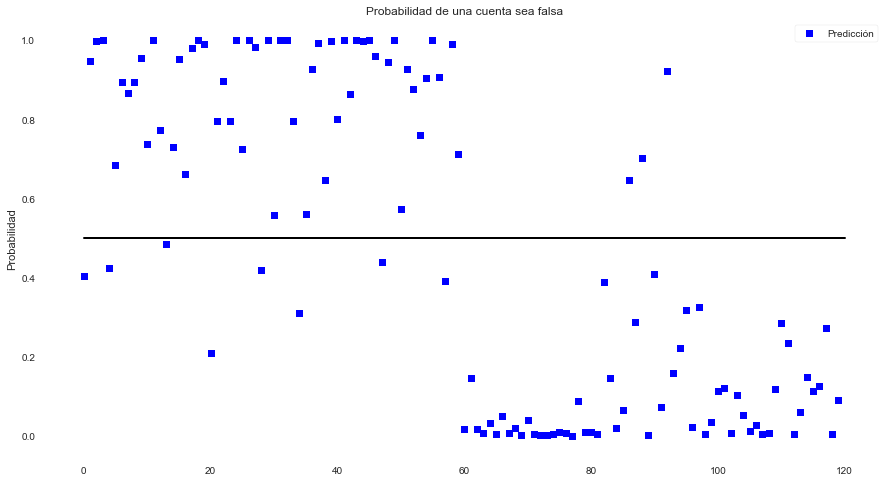

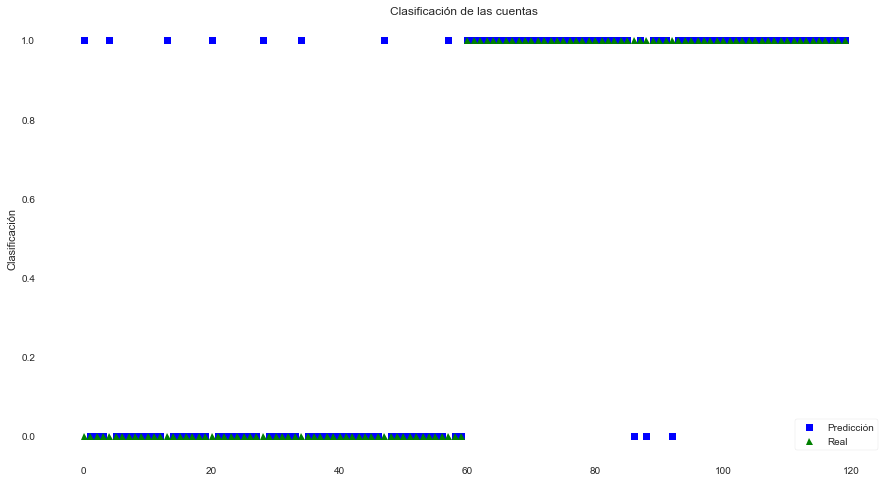

In [ ]:
fig = plt.figure(figsize=(15,8))

proba_fake = [i[0] for i in proba]

ax = fig.add_subplot(1,1,1)
ax.plot(proba_fake,'bs',label='Predicción')
ax.plot([0, 120], [0.5, 0.5], 'k-', lw=2)
ax.set(title='Probabilidad de una cuenta sea falsa', 
     ylabel='Probabilidad')
ax.legend()

plt.show()

fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(1,1,1)
ax.plot(pred,'bs',label='Predicción')
ax.plot(Y_test,'g^',label='Real')
ax.set(title='Clasificación de las cuentas', 
     ylabel='Clasificación')
ax.legend()

plt.show()

## Taller
Con los datos proporcionados en el primer punto, resuelva:


# Punto 1

1. Diligenciar la siguiente tabla teniendo en cuenta la optimización de parametros por cada uno de los parametros según corresponda.

| Algoritmo | Alpha |  Error ($R^2$) |
| --- | --- |--- |
| Regresión Lineal: | None  | 0.6842 |
| Regresión Polinomial: | 2 (as degree) | 0.63 |
| Regresión Ridge (L2): | 0.95  | 0.6841 |
| Regresión Lasso (L1): | 0.94  | 0.6842 |

# Data

In [ ]:
url = 'https://raw.githubusercontent.com/jcestevezc/Machine-Learning-Techniques/master/Laboratorio%202/Problema%201/kc_house_data.csv'
data = pd.read_csv(url)
data.head()

columns = ['id','date','zipcode','sqft_above']
data = data.pipe(outlier_cleaning).pipe(data_selection,columns)
X = data.drop(['price'],axis=1)
y = data['price']
columns = X.columns

from sklearn.pipeline import Pipeline

pipeline_cleaning = Pipeline([('normalization', MinMaxScaler(feature_range=(0, 1))),])
X = pipeline_cleaning.fit_transform(X)
X = pd.DataFrame(X,columns=columns)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=33)

# LASSO

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

lasso_params = {'alpha':list(np.arange(0.1,5,0.2))}

In [ ]:
GridSearchCV(Lasso(), param_grid=lasso_params).fit(X_train, y_train).best_estimator_

Lasso(alpha=0.9000000000000001)

In [ ]:
deep_lasso_params = {'alpha':list(np.arange(0.85,0.95,0.01))}
GridSearchCV(Lasso(), param_grid=deep_lasso_params).fit(X_train, y_train).best_estimator_

Lasso(alpha=0.9400000000000001)

In [ ]:
LassoModel = Lasso(alpha=0.94).fit(X_train, y_train)
LassoPredictions = LassoModel.predict(X_test)
r2_score(y_test, LassoPredictions)

0.6841730844718488

# Ridge

In [ ]:
from sklearn.linear_model import Ridge
GridSearchCV(Ridge(), param_grid=lasso_params).fit(X_train, y_train).best_estimator_

Ridge(alpha=0.1)

In [ ]:
deep_lasso_params = {'alpha':list(np.arange(0.95,1.05,0.01))}
GridSearchCV(Ridge(), param_grid=deep_lasso_params).fit(X_train, y_train).best_estimator_

Ridge(alpha=0.95)

In [ ]:
RidgeModel = Ridge(alpha=0.95).fit(X_train, y_train)
RidgePredictions = RidgeModel.predict(X_test)
r2_score(y_test, RidgePredictions)

0.6840837245066589

# Linear Regression

### There is not alpha value for linear regression model. 

In [ ]:
LinearModel = LinearRegression().fit(X_train, y_train)
LinearModelPredictions = LinearModel.predict(X_test)
r2_score(y_test, LinearModelPredictions)

0.6841697323027314

# Polynomial Regression

En el laboratorio 1 encontramos que el mejor grado para la regresión polinómica era el 2 con un valor de $R^2=0.63$ al probar con 5 diferentes valores de grados del polinomio. 

2. Realice una tabla en donde pueda validar la varianza y el sesgo para los diferentes modelos

In [ ]:
def values_lasso(values, x, y):
    a = []
    for v in values:
        LassoModel = Lasso(alpha=v).fit(X_train, y_train)
        LassoPredictions = LassoModel.predict(x)
        a.append(round(r2_score(y, LassoPredictions),3))
    return a

val_lasso = [0,1,10,100,1000,2000]
r2_errors_train = values_lasso(val_lasso,X_train, y_train)
r2_errors_test = values_lasso(val_lasso,X_test, y_test)

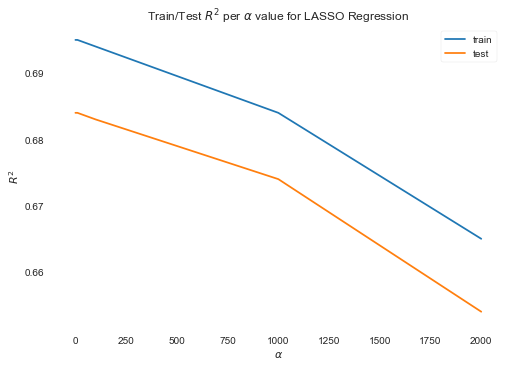

In [ ]:
plt.plot(val_lasso, r2_errors_train, label='train')
plt.plot(val_lasso, r2_errors_test, label='test')
plt.xlabel(r'$\alpha$')
plt.ylabel(r'$R^2$')
plt.title(r'Train/Test $R^2$ per $\alpha$ value for LASSO Regression')
plt.legend()

In [ ]:
def values_ridge(values, x, y):
    a = []
    for v in values:
        RidgeModel = Ridge(alpha=v).fit(X_train, y_train)
        RidgePredictions = RidgeModel.predict(x)
        a.append(r2_score(y, RidgePredictions))
    return a

val_lasso = [0,1,10,100,1000,2000]
r2_errors_train = values_ridge(val_lasso,X_train, y_train)
r2_errors_test = values_ridge(val_lasso,X_test, y_test)

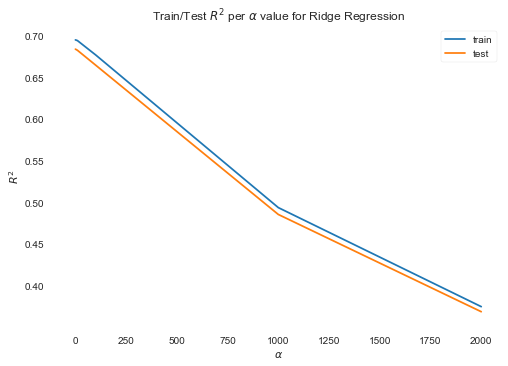

In [ ]:
plt.plot(val_lasso, r2_errors_train, label='train')
plt.plot(val_lasso, r2_errors_test, label='test')
plt.xlabel(r'$\alpha$')
plt.ylabel(r'$R^2$')
plt.title(r'Train/Test $R^2$ per $\alpha$ value for Ridge Regression')
plt.legend()

Para el caso de la regresión polinómica tenemos la siguiente tabla:

| Degree |  Error ($R^2$) |
| --- | --- |--- |
| 2: | 0.63 |
| 3: | 0.00 |
| 4: | 0.01 |
| 5: | 0.00 |

Para el caso de la regresión lineal no se tiene curva, ni tabla para poder observar el trade-off de bias-varianza dado que no hay hiperparámetro a entonar.

# Conclusiones

1. Se logró entonar el hiperparámetro alpha de las regresiones regularizadas LASSO y Ridge. 

2. Se puede observar que el valor de $R^2$ tanto como para la regresión lineal, como para Ridge da valores muy similares.

3. Aún no es claro el por qué los resultados de los valores de error de las predicciones sobre los conjuntos de entrenamiento y prueba para diferentes parámetros alpha nunca difieren. Lo que debería pasar, según la teoría, es que si el parámetro $\alpha$ (que es la penalización por utilizar otros términos más en el modelo, es decir, hacerlo más complejo) es muy alto, caemos en el caso de la regresión lineal, para la cual, nos dio el mejor valor $R^2$. Por ende, para un $\alpha$ grande debería haber dado un $R^2$ grande y no como ocurre en la gráfica que tendió a la baja.

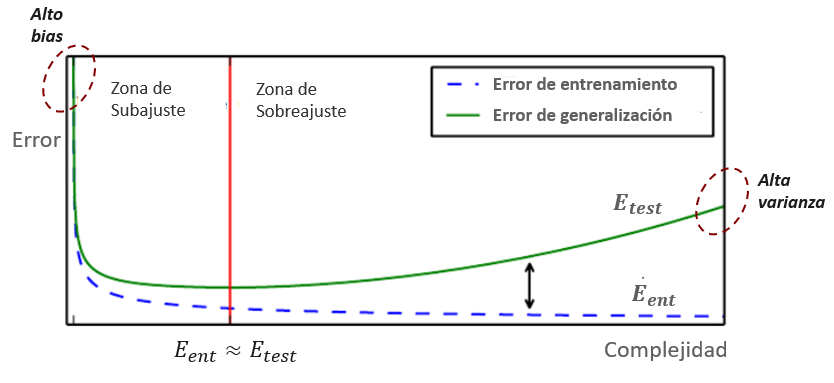

3. Con los datos del segundo punto:

    3.1. Realice un ajuste de hiperparámetros para los valores de `C` y `penalty` en la regresión logística. La idea es lograr un mejor resultado al proporcionado por el modelo por defecto.

    3.2. Con el mejor modelo encontrado, realice una gráfica de precisión-sensibilidad variando el umbral de selección para ambas clases [0,1].

# Punto 2

3.2 Grafica precisión-sensibilidad para el modelo original

In [ ]:
train = pd.read_csv("https://raw.githubusercontent.com/jcestevezc/Machine-Learning-Techniques/master/Laboratorio%202/Problema%202/train.csv")
test = pd.read_csv("https://raw.githubusercontent.com/jcestevezc/Machine-Learning-Techniques/master/Laboratorio%202/Problema%202/test.csv")

from sklearn.metrics import precision_recall_curve
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

X_train, Y_train = train.drop(['fake'],axis=1), train['fake']
X_test, Y_test = test.drop(['fake'],axis=1), test['fake']
display(X_train.head())

regression = LogisticRegression(random_state=1)
regression.fit(X_train,Y_train)

p, r, thresholds = precision_recall_curve(Y_test, regression.predict(X_test))

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows
0,1,0.27,0,0.0,0,53,0,0,32,1000,955
1,1,0.00,2,0.0,0,44,0,0,286,2740,533
2,1,0.10,2,0.0,0,0,0,1,13,159,98
3,1,0.00,1,0.0,0,82,0,0,679,414,651
4,1,0.00,2,0.0,0,0,0,1,6,151,126


In [ ]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    """
    Modified from:
    Hands-On Machine learning with Scikit-Learn
    and TensorFlow; p.89
    """
    plt.figure(figsize=(8, 8))
    plt.title("Precision and Recall Scores as a function of the decision threshold")
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.ylabel("Score")
    plt.xlabel("Decision Threshold")
    plt.legend(loc='best')

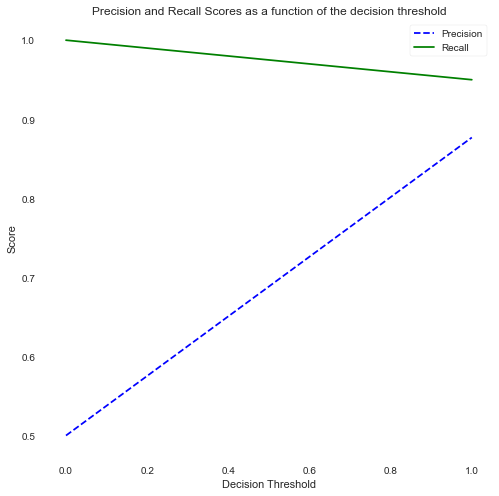

In [ ]:
plot_precision_recall_vs_threshold(p, r, thresholds)

3.2 Grafica precisión-sensibilidad para el modelo optimizado

In [ ]:
regressionOptimized = LogisticRegression(C=0.3,penalty='l2',random_state=1,solver='lbfgs')
regressionOptimized.fit(X_train,Y_train)

p, r, thresholds = precision_recall_curve(Y_test, regressionOptimized.predict(X_test))

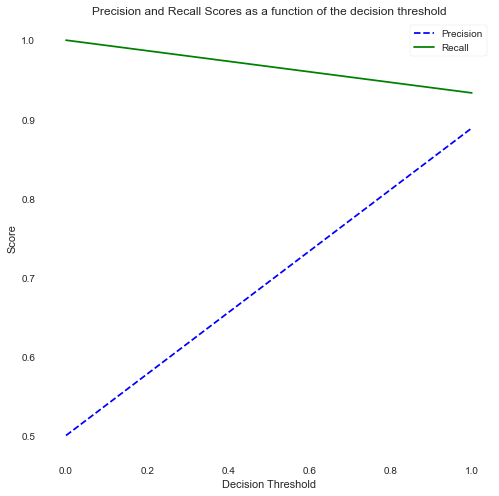

In [ ]:
plot_precision_recall_vs_threshold(p, r, thresholds)

Graficas para el de conjunto de entrenamiento

In [ ]:
p, r, thresholds = precision_recall_curve(Y_train, regression.predict(X_train))

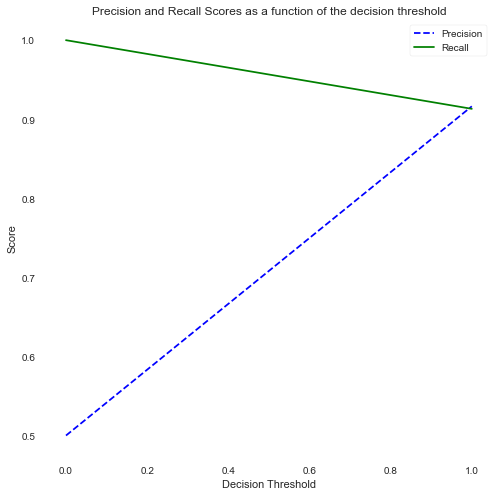

In [ ]:
plot_precision_recall_vs_threshold(p, r, thresholds)

Datos de entrenamiento con el modelo optimizado

In [ ]:
p, r, thresholds = precision_recall_curve(Y_train, regressionOptimized.predict(X_train))

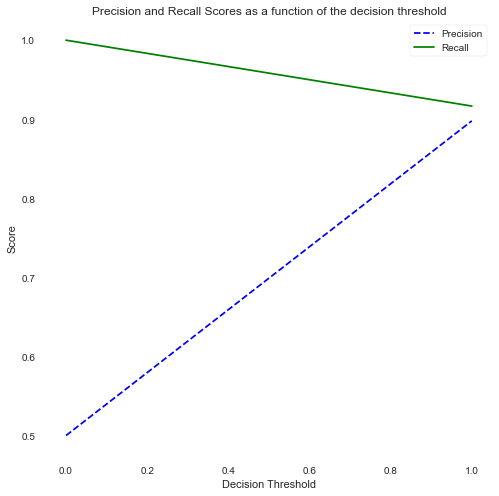

In [ ]:
plot_precision_recall_vs_threshold(p, r, thresholds)

# Conclusiones

*   Con los valores originales se obtuvo unos valores de presicion y recall mas optimos
*   Con el valor optimizado se acerco mas a el punto en donde el recall y la precision convergen
*   Cambiando el algoritmo a 'liblinear con c=10' se llego a una precision de 1 para los positivos y de 1 para recall en caso de los negativos.
Pero en casos contrarios demasiados bajo demasiado la precision y el recall lo cual nos indican que hay un prioridad en el recall.


```
regressionOptimized = LogisticRegression(C=10,penalty='l2',random_state=0,solver='liblinear')
```

*   los fatores mas decisivos son que tipo de solver y el valor del penalty si es 'l1' o 'l2' despues de un punto que se aumentaba demasiado el alfa(c) no mejoraba el modelo
*  entre menor es el valor de c mayor era la regularizacion






                